In [1]:
!pwd
import os
os.chdir('..')
!pwd

/Users/miguelmartins/Projects/hybrid-hmm/notebooks
/Users/miguelmartins/Projects/hybrid-hmm


In [2]:
import numpy as np
import tensorflow as tf
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from utility_functions.metrics import schmidt_metrics

In [3]:
!pwd

/Users/miguelmartins/Projects/hybrid-hmm


In [4]:
!ls results/hybrid/circor/hmm_mmi_circor_envelops_nnonly_adam1e3/2022-09-07_15:29:09


ground_truth.mat out_seq.mat      p_states.mat     viterbi.mat


In [5]:
def schmidt_fold(gt, _h_vit):
    n_folds = gt.shape[0]
    mean_fold_ppv = []
    mean_fold_sensitivity = []
    for fold in range(n_folds):
        n_sounds = gt[fold].shape[0]
        ppv, sensitivity = [], []
        for sound in range(n_sounds):
            ppv_, sensitivity_ = schmidt_metrics(gt[fold][sound], _h_vit[fold][sound])
            ppv.append(ppv_)
            sensitivity.append(sensitivity_)
        mean_fold_ppv.append(np.mean(ppv))
        mean_fold_sensitivity.append(np.mean(sensitivity))

    return mean_fold_ppv, mean_fold_sensitivity

In [6]:
def read_results(path: str):
    gt = sio.loadmat(path + '/ground_truth.mat', squeeze_me=True)['ground_truth']
    cnn = sio.loadmat(path + '/out_seq.mat', squeeze_me=True)['out_seq']
    vit = sio.loadmat(path + '/viterbi.mat', squeeze_me=True)['viterbi']
    return gt, cnn, vit

In [7]:
def get_accuracy(gt, cnn, n_folds=10):
    acc_folds = []
    for fold in range(n_folds):
        accuracy = []
        for sound in range(len(gt[fold])):
            try:
                accuracy.append(accuracy_score(gt[fold][sound], cnn[fold][sound]))
            except:
                print("fold", fold, "sound", sound, " ", gt[fold][sound].shape, cnn[fold][sound].shape)
                pass
        acc_folds.append(np.mean(accuracy))
    return acc_folds

In [8]:

def metrics_model(path: str):
    gt, cnn, vit = read_results(path)
    accuracy = get_accuracy(gt, vit)
    ppv, sensitivity = schmidt_fold(gt, vit)
    return accuracy, ppv, sensitivity

In [9]:
!ls 


circor_hybrid_cle_env = metrics_model('results/hybrid/circor/hmm_completelikelihood_circor_envelops_joint/2022-07-14_21:38:18')
circor_unet_cre_env = metrics_model('results/unet/circor/unet/2022-06-20_10_40_26')
circor_hybrid_1epoch = metrics_model('results/hybrid/circor/hmm_completelikelihood_circor_envelops_joint/2022-07-19_17:09:36')
# v não é nn only. é nn + HMM com SGD com learning rate 1e-4
circor_hybrid_env_cl_nn_only = metrics_model('results/hybrid/circor/hmm_completelikelihood_circor_envelops_joint/2022-07-22_18:36:22')
circor_nn_only_env_cl = metrics_model('results/hybrid/circor/hmm_completelikelihood_circor_envelops_nnonly/2022-07-31_16:50:27')

circor_nn_only_env_mmi_1e4 = metrics_model('results/hybrid/circor/hmm_mmi_circor_envelops_nnonly_adam1e4/2022-08-22_13:56:23')
circor_nn_only_env_mmi_1e3 = metrics_model('results/hybrid/circor/hmm_mmi_circor_envelops_nnonly_adam1e3/2022-09-07_15:29:09')

circor_fernando = metrics_model('results/fernando/circor/fernando_CE_physio16_mfcc_joint/2022-09-16_15_46_30')

README.md                       notebook
checkpoint                      notebooks
circor_100_nogaps_50hz.npy      random_init.data-00000-of-00001
circor_100_raw_50hz.npy         random_init.index
circor_springer_np.npy          requirements.txt.py
custom_train_functions          results
data_processing                 test.txt
datasets                        tests
loss_functions                  train_scripts
models                          utility_functions


In [10]:
!ls results/fernando/circor/fernando_CE_physio16_mfcc_joint/2022-09-16_15_46_30

ground_truth.mat     test_indexes.mat     viterbi.mat
out_seq.mat          train_indexes.mat    weights_fold0.hdf5
p_states.mat         trans_mat.mat        weights_fold1.hdf5
p_states_fold_0.npy  trans_mat_fold_0.npy weights_fold2.hdf5
p_states_fold_1.npy  trans_mat_fold_1.npy weights_fold3.hdf5
p_states_fold_2.npy  trans_mat_fold_2.npy weights_fold4.hdf5
p_states_fold_3.npy  trans_mat_fold_3.npy weights_fold5.hdf5
p_states_fold_4.npy  trans_mat_fold_4.npy weights_fold6.hdf5
p_states_fold_5.npy  trans_mat_fold_5.npy weights_fold7.hdf5
p_states_fold_6.npy  trans_mat_fold_6.npy weights_fold8.hdf5
p_states_fold_7.npy  trans_mat_fold_7.npy weights_fold9.hdf5
p_states_fold_8.npy  trans_mat_fold_8.npy
p_states_fold_9.npy  trans_mat_fold_9.npy


In [11]:
gt, cnn, vit = read_results('results/hybrid/circor/hmm_completelikelihood_circor_envelops_joint/2022-07-14_21:38:18')

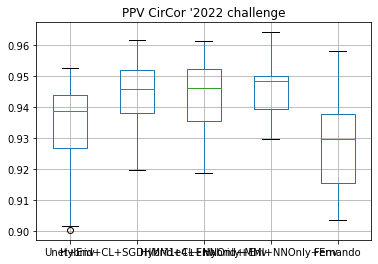

In [12]:
df = pd.DataFrame({
    'Unet+Env': circor_unet_cre_env[1],
    'Hybrid+CL+SGDHMM1e4+Env': circor_hybrid_env_cl_nn_only[1],
    'Hybrid+CL+NNOnly+Env': circor_nn_only_env_cl[1],
    'Hybrid+MMI+NNOnly+Env': circor_nn_only_env_mmi_1e4[1],
    'Fernando': circor_fernando[1]
                   })

boxplot = df.boxplot(column=list(df.keys()), figsize=(40,20))
plt.title('PPV CirCor \'2022 challenge')
plt.show()

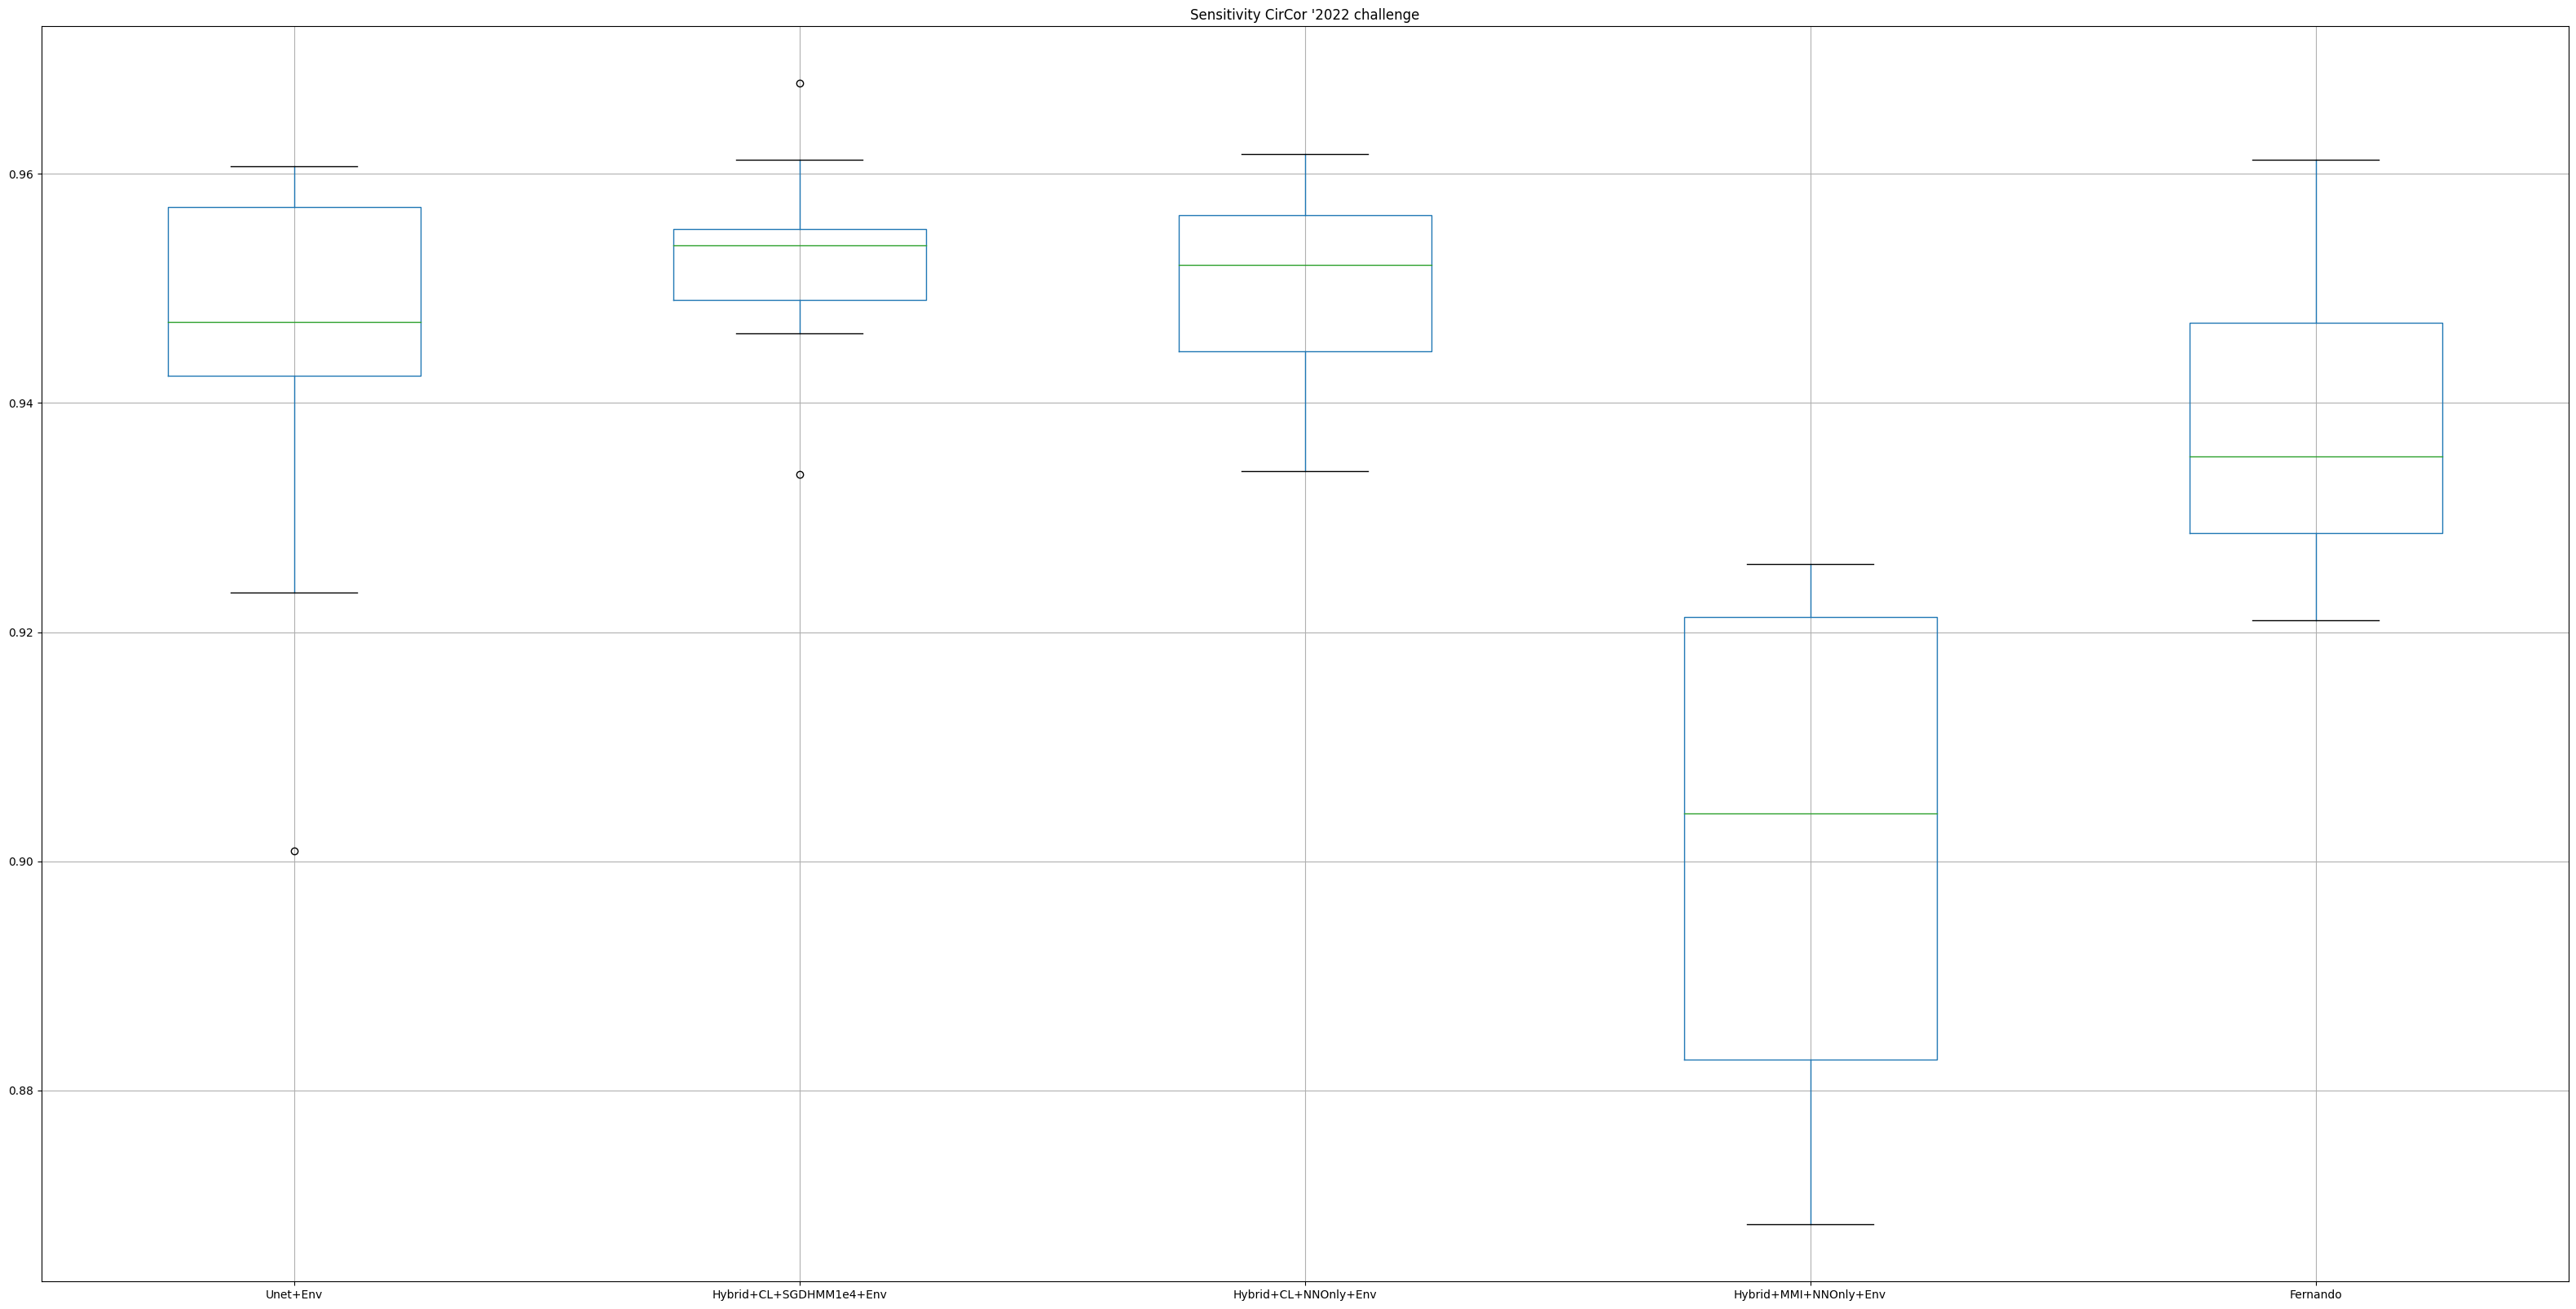

In [13]:
df = pd.DataFrame({
    'Unet+Env': circor_unet_cre_env[2],
    'Hybrid+CL+SGDHMM1e4+Env': circor_hybrid_env_cl_nn_only[2],
    'Hybrid+CL+NNOnly+Env': circor_nn_only_env_cl[2],
    'Hybrid+MMI+NNOnly+Env': circor_nn_only_env_mmi_1e3[2],
    'Fernando': circor_fernando[2]
    
                   })

boxplot = df.boxplot(column=list(df.keys()), figsize=(40,20))
plt.title('Sensitivity CirCor \'2022 challenge')
plt.show()

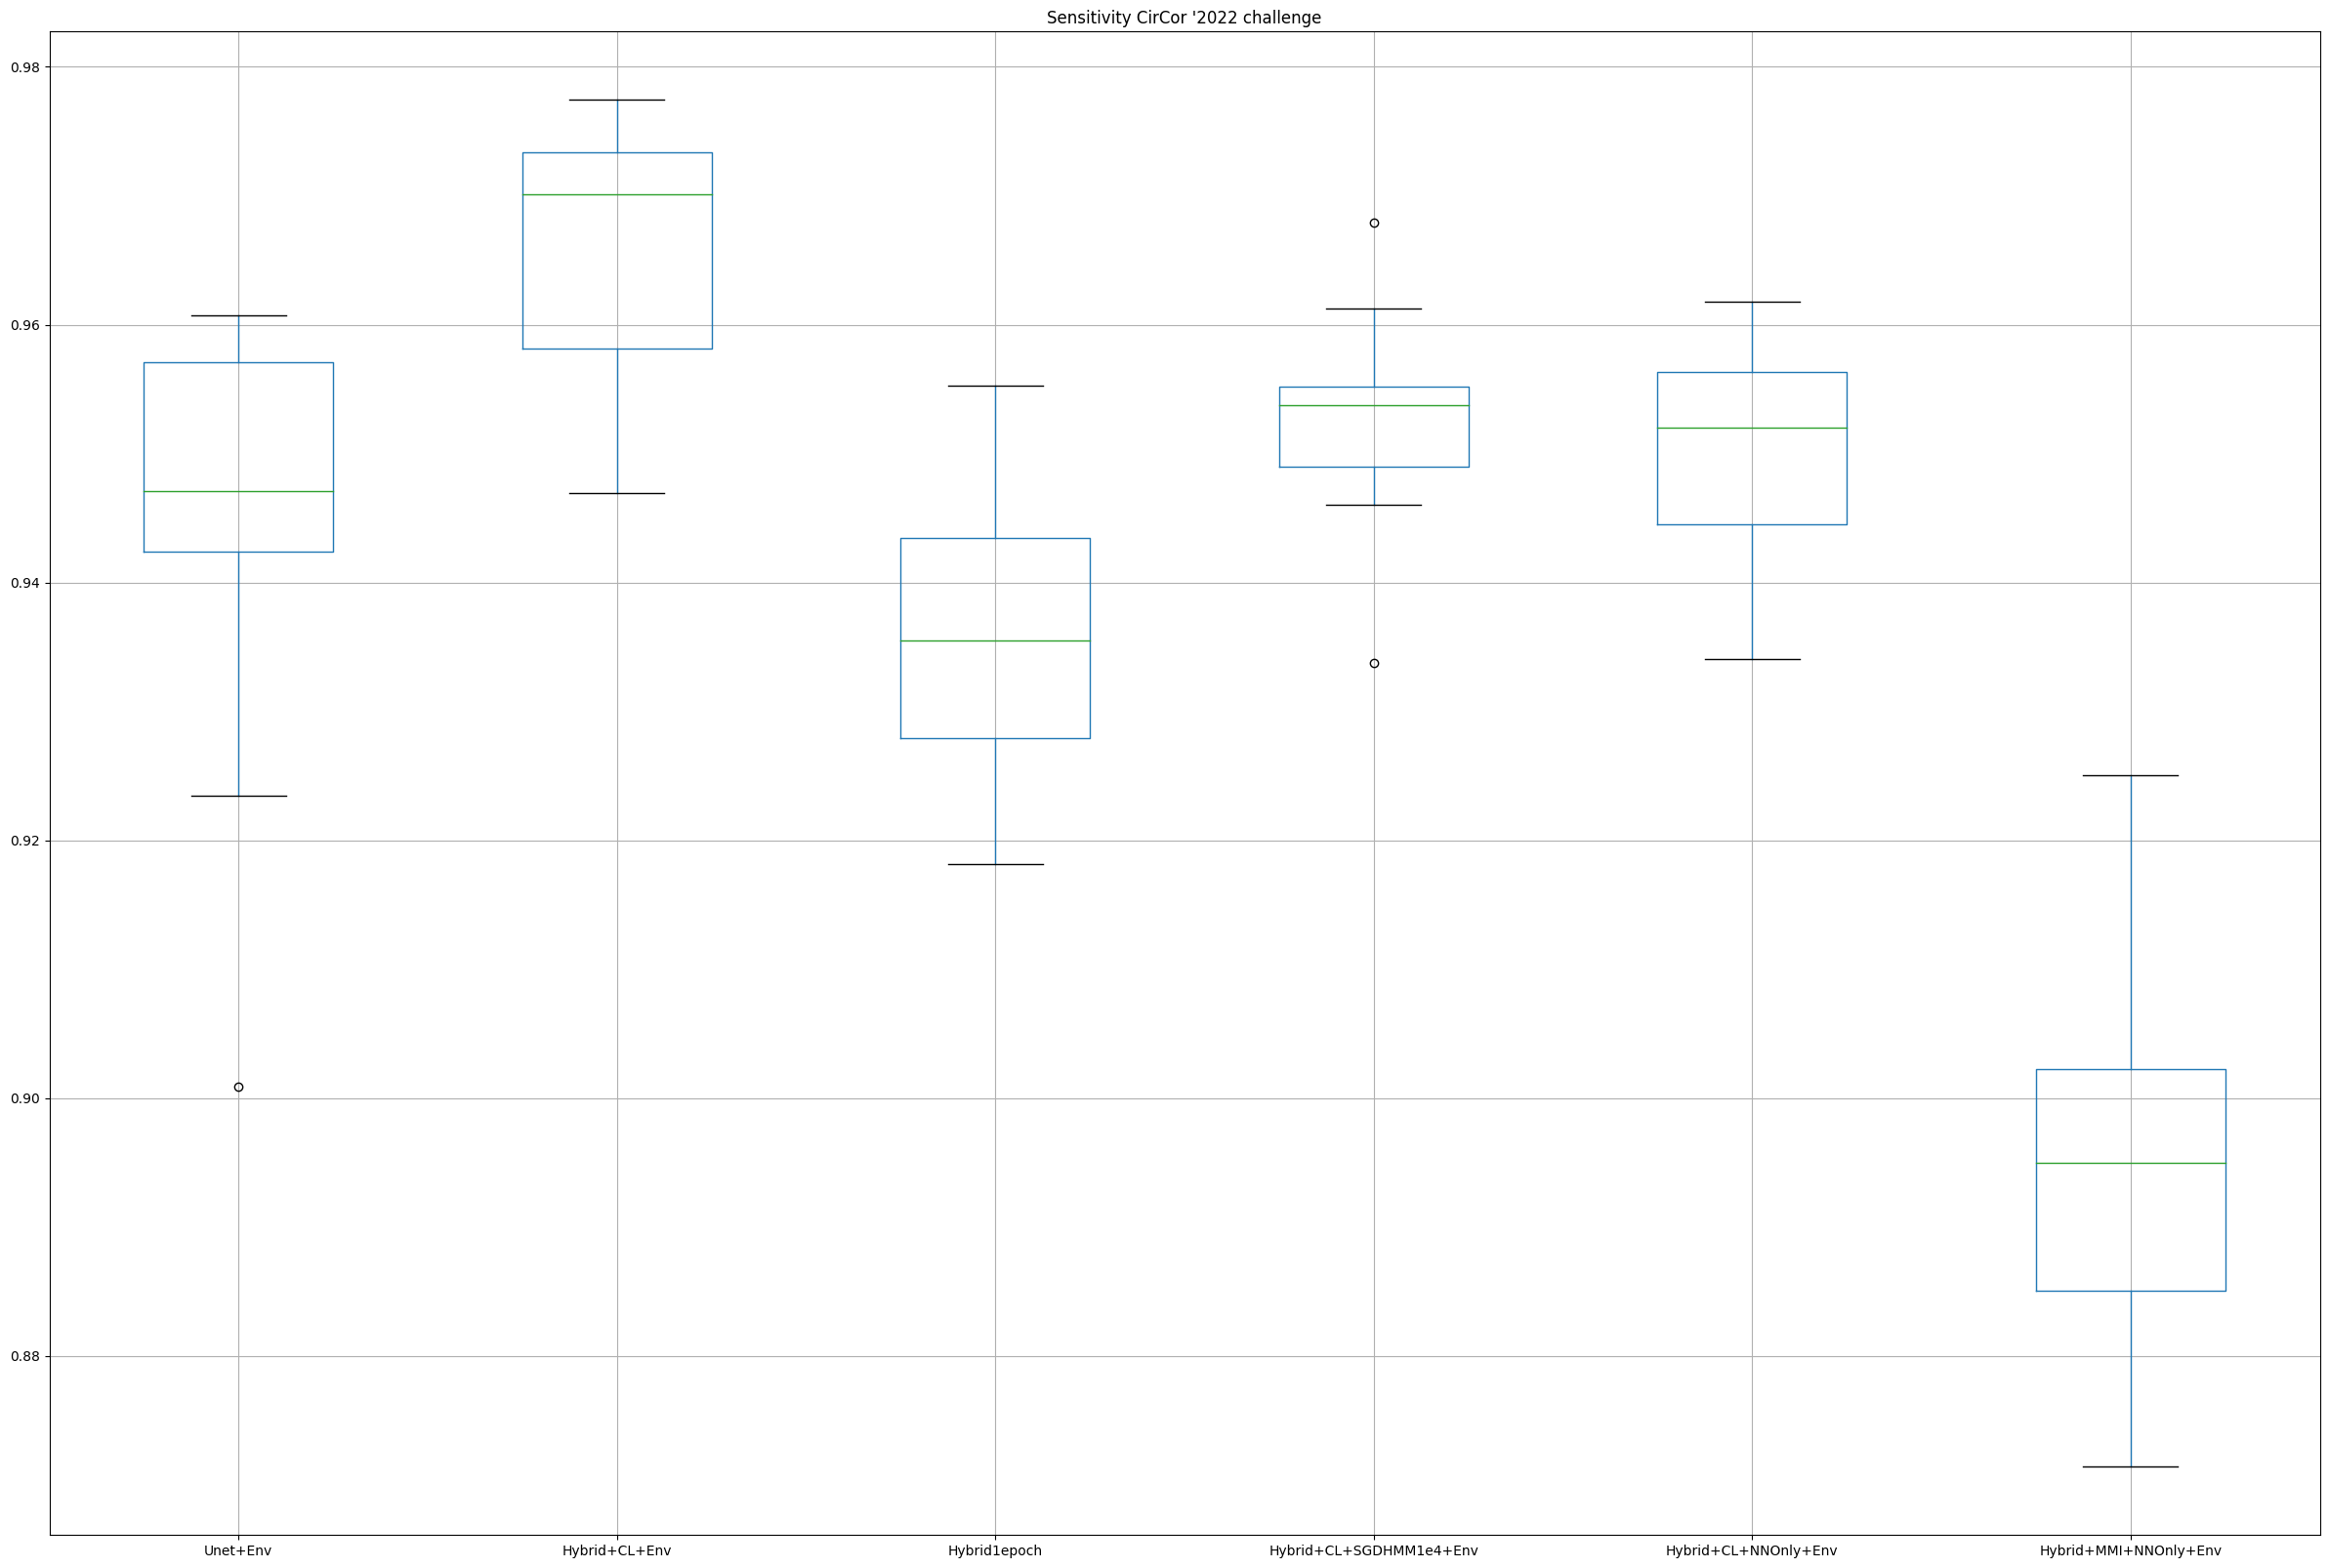

In [14]:
df = pd.DataFrame({
    'Unet+Env': circor_unet_cre_env[2],
    'Hybrid+CL+Env': circor_hybrid_cle_env[2],
    'Hybrid1epoch': circor_hybrid_1epoch[2],
    'Hybrid+CL+SGDHMM1e4+Env': circor_hybrid_env_cl_nn_only[2],
    'Hybrid+CL+NNOnly+Env': circor_nn_only_env_cl[2],
    'Hybrid+MMI+NNOnly+Env': circor_nn_only_env_mmi_1e4[2]
                   })

boxplot = df.boxplot(column=list(df.keys()), figsize=(30,20))
plt.title('Sensitivity CirCor \'2022 challenge')
plt.show()



In [16]:
 circor_unet_cre_env[2], circor_hybrid_env_cl_nn_only[2]

([0.9464495966775881,
  0.9009222577219589,
  0.9570922911019096,
  0.9579092261157683,
  0.9413642090046082,
  0.9477610025518295,
  0.9454448691338878,
  0.9570754823843536,
  0.9234297227429643,
  0.9606859235052334],
 [0.9531751293995137,
  0.9544647386416951,
  0.9554442936816346,
  0.9543837076532243,
  0.9460616403141231,
  0.9492521142391139,
  0.9489077645518325,
  0.9612265530178732,
  0.9337805409365841,
  0.9678918015295088])

## Rerun Physionet'16
Should results suck on physionet, try mmi / CL Adam 1e-4

In [9]:
ph16_crosse_unet_env = metrics_model('results/unet/unet/2022-02-26_07_49_39')
ph16_fernando_CE_mfcc = metrics_model('results/rerun/fernando/fernando_CE_physio16_mfcc_joint/2022-09-17_07_52_13/')
ph16_hmm_nnonly_mmi_env = metrics_model('results/rerun/hybrid/hmm_nnonly_mmi_env_physio16/2022-09-17_10_08_14')
ph16_hmm_hybrid_mmi_env = metrics_model('results/rerun/hybrid/hmm_hybrid_mmi_env_physio16/2022-09-16_15_46_30')

In [12]:
!ls 

checkpoint                             p_states_fold_0.npy
cnn_weights_fold_0.data-00000-of-00001 p_states_fold_1.npy
cnn_weights_fold_0.index               p_states_fold_2.npy
cnn_weights_fold_1.data-00000-of-00001 p_states_fold_3.npy
cnn_weights_fold_1.index               p_states_fold_4.npy
cnn_weights_fold_2.data-00000-of-00001 p_states_fold_5.npy
cnn_weights_fold_2.index               p_states_fold_6.npy
cnn_weights_fold_3.data-00000-of-00001 p_states_fold_7.npy
cnn_weights_fold_3.index               p_states_fold_8.npy
cnn_weights_fold_4.data-00000-of-00001 p_states_fold_9.npy
cnn_weights_fold_4.index               test_indexes.mat
cnn_weights_fold_5.data-00000-of-00001 train_indexes.mat
cnn_weights_fold_5.index               trans_mat.mat
cnn_weights_fold_6.data-00000-of-00001 trans_mat_fold_0.npy
cnn_weights_fold_6.index               trans_mat_fold_1.npy
cnn_weights_fold_7.data-00000-of-00001 trans_mat_fold_2.npy
cnn_weights_fold_7.index               trans_mat_fold_3.npy
cnn_

Text(0.5, 1.0, "PPV Physionet'2016 challenge")

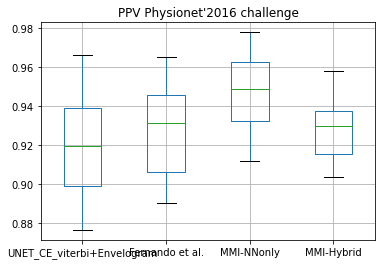

In [10]:
df = pd.DataFrame({'UNET_CE_viterbi+Envelogram': ph16_crosse_unet_env[1],
                   'Fernando et al.': ph16_fernando_CE_mfcc[1],
                   'MMI-NNonly': ph16_hmm_nnonly_mmi_env[1], 
                   'MMI-Hybrid': ph16_hmm_hybrid_mmi_env[1]
                   }) # no grads CL, no grads MMI,  CL envelogram, corrected fernando
boxplot = df.boxplot(column=list(df.keys()), figsize=(30,20))
plt.title('PPV Physionet\'2016 challenge')


Text(0.5, 1.0, "Sensitivity Physionet'2016 challenge")

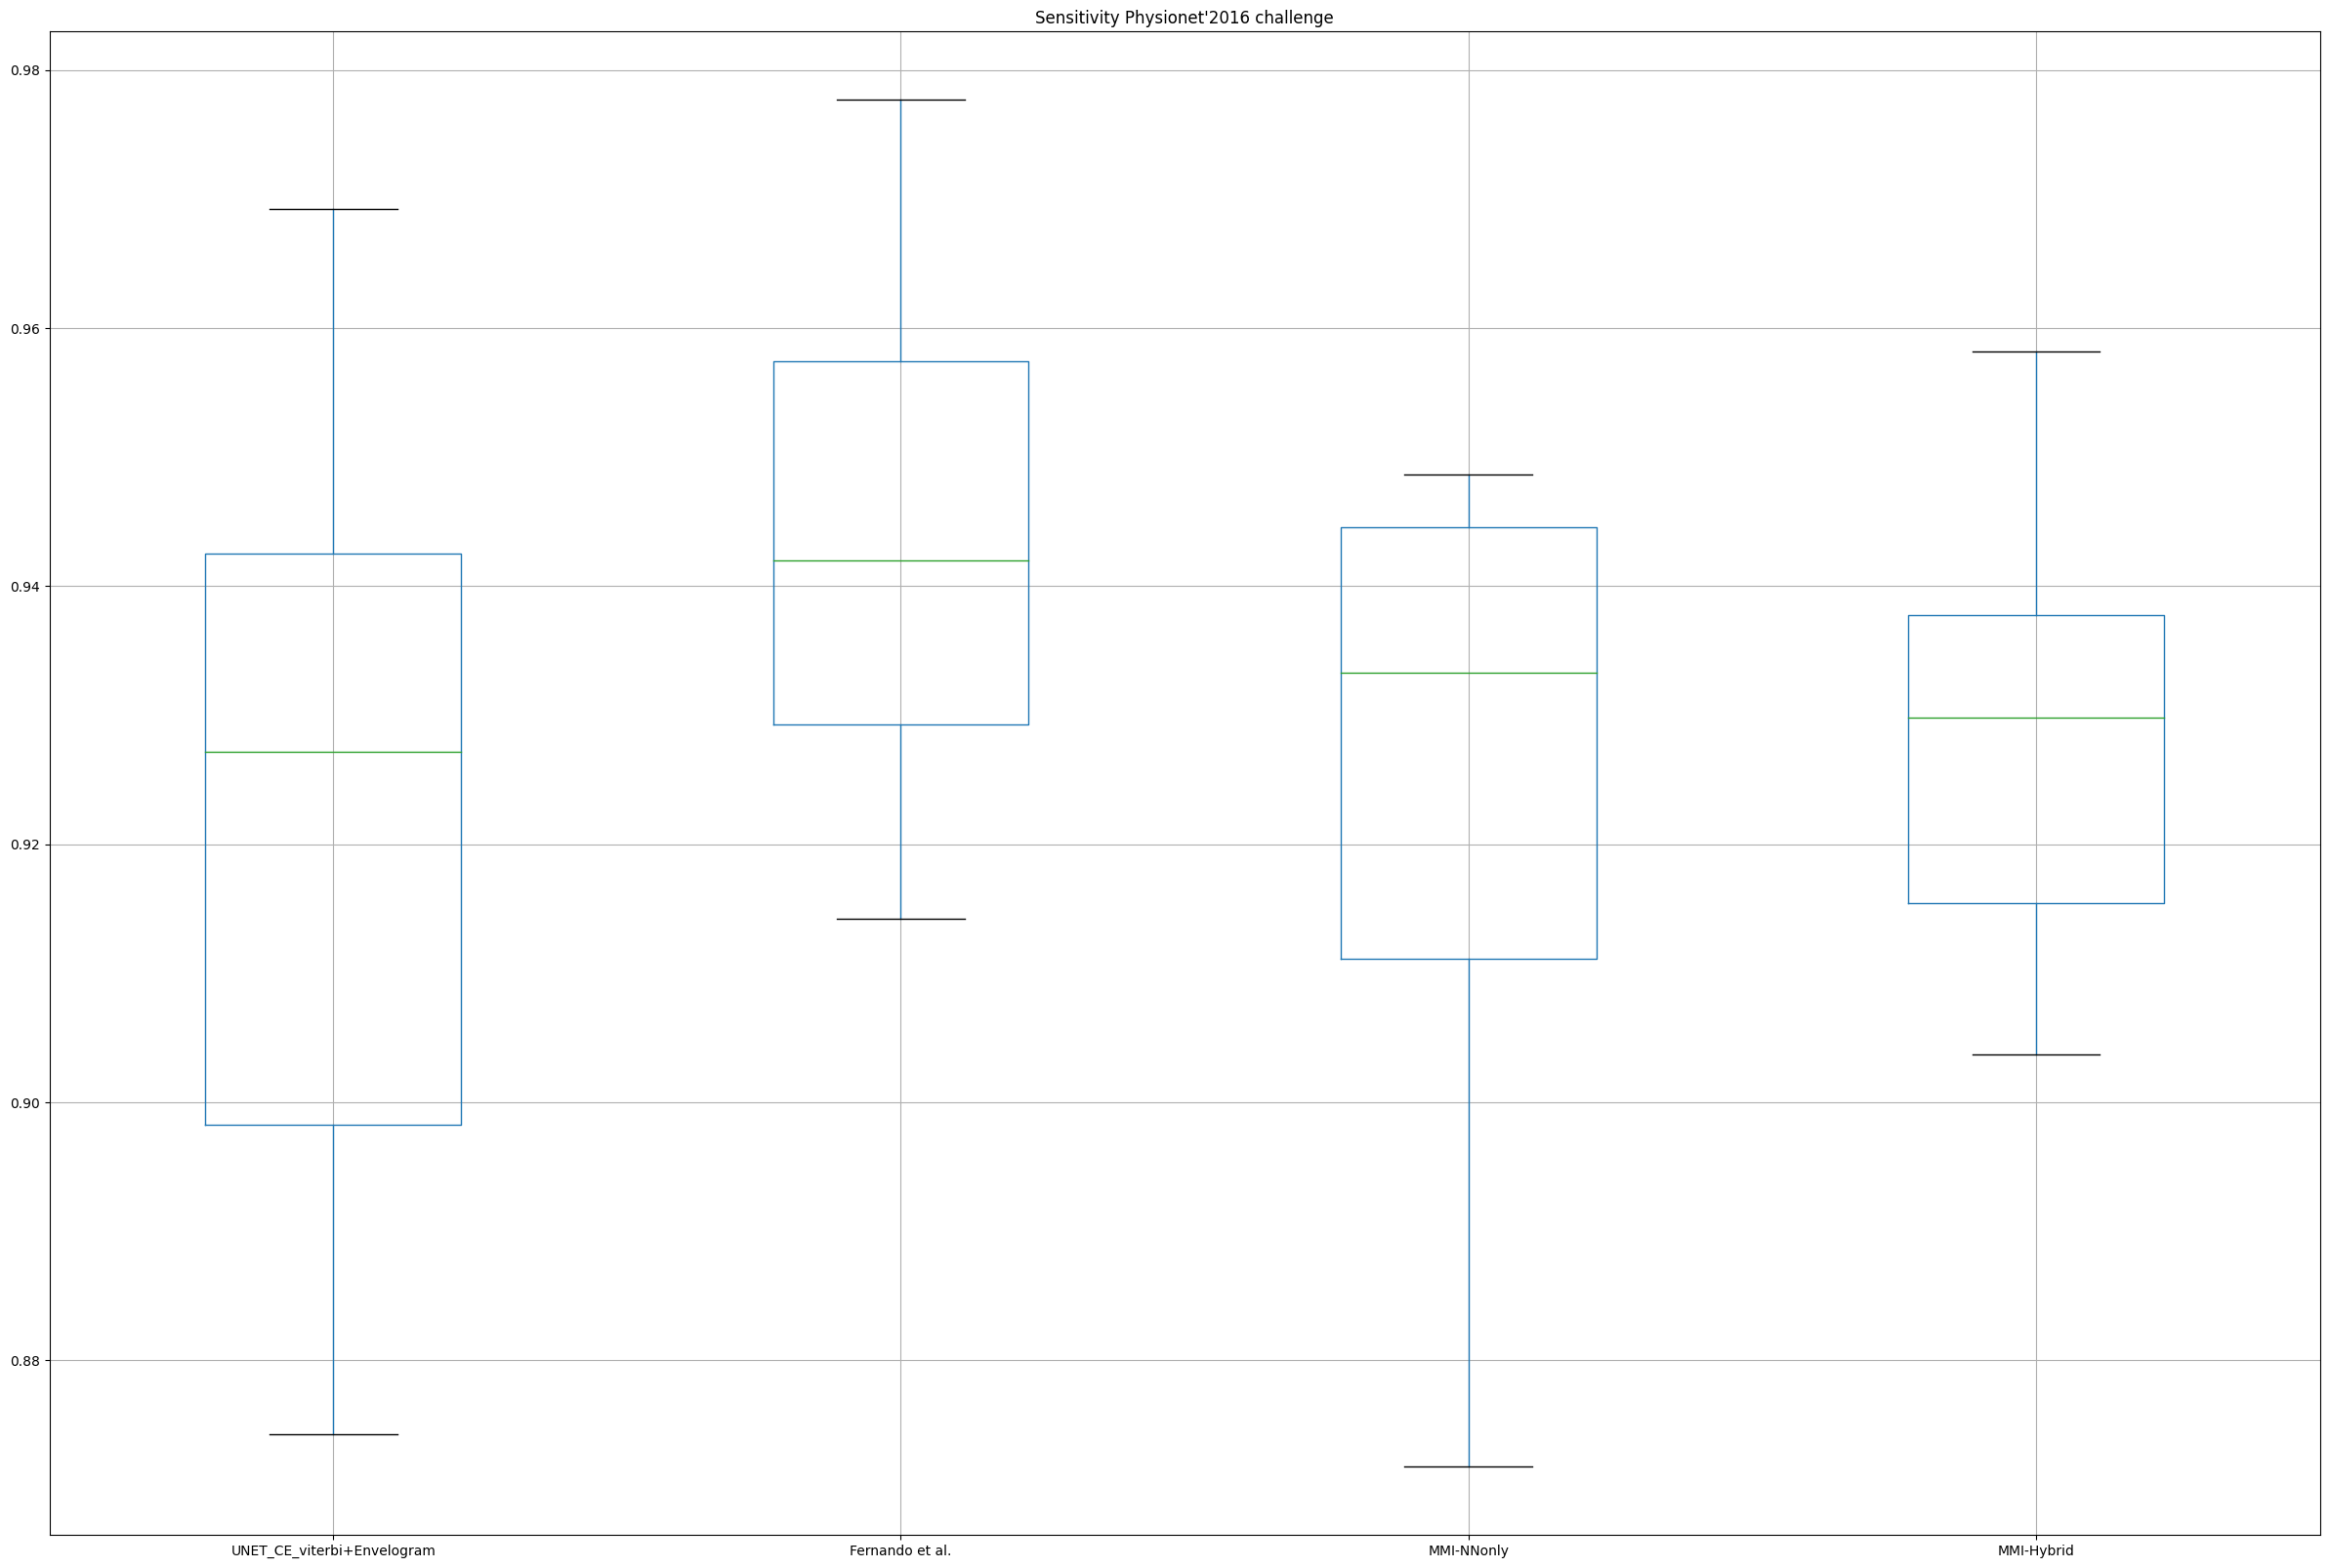

In [11]:
df = pd.DataFrame({'UNET_CE_viterbi+Envelogram': ph16_crosse_unet_env[2],
                   'Fernando et al.': ph16_fernando_CE_mfcc[2],
                   'MMI-NNonly': ph16_hmm_nnonly_mmi_env[2], # run at 1e-3
                   'MMI-Hybrid': ph16_hmm_hybrid_mmi_env[1]  # run at 1e-3 maybe try 1e-4
                   }) # no grads CL, no grads MMI,  CL envelogram, corrected fernando
boxplot = df.boxplot(column=list(df.keys()), figsize=(30,20))
plt.title('Sensitivity Physionet\'2016 challenge')

In [30]:
# Hybrid gradients_physionet16_cnn_envelograms_only 
ph16_hybrid_cnn_env = metrics_model('results/hybrid/hmm_gradshybrid_envelograms_physio16_10fold/2022-02-25_08_33_40')
ph16_crosse_unet_env = metrics_model('results/unet/unet/2022-02-26_07_49_39')
ph16_hybrid_cnn_psd = metrics_model('results/hybrid/hmm_gradshybrid_psd_physio16_10fold/2022-03-08_18_16_35')
ph16_true_hybrid_cnn_env = metrics_model('results/hybrid/hmm_mmi_physio16_envelops_joint/2022-03-17_13_51_45')
ph16_completemmi_hybrid_cnn_env = metrics_model('results/hybrid/hmm_completemmi_physio16_envelops_joint/2022-03-18_14_03_27')
ph16_completelikelihood_hybrid_cnn_env = metrics_model('results/hybrid/hmm_completlikelihood1e3_physio16_envelops_joint/2022-03-20_12_55_33')
ph16_completelikelihood_hybrid_cnn_psd = metrics_model('results/hybrid/hmm_completlikelihood1e3_physio16_psd_joint/2022-03-21_15_58_21')
ph16_completelikelihood_hybrid_cnn_mfcc = metrics_model('results/hybrid/hmm_completlikelihood1e3_physio16_mfcc_joint/2022-05-03_10_09_45') 
ph16_fernado_mfcc_joint = metrics_model('results/fernando/fernando_CE_physio16_mfcc_joint/2022-05-02_09_40_01')

# Fine-tune HMM gradients only 
# ph16_psd_fine_tune_hmm20 = metrics_model('results/hybrid/fine_tune/hmm_completlikelihood1e3_physio16_psd_joint/2022-05-04_14_56_00')

# Train CNN only 
#

ph16_completelikelihood_cnngrads_psd = metrics_model('results/hybrid/hmm_only_completlikelihood1e3_physio16_psd_joint/2022-04-22_09_26_46')

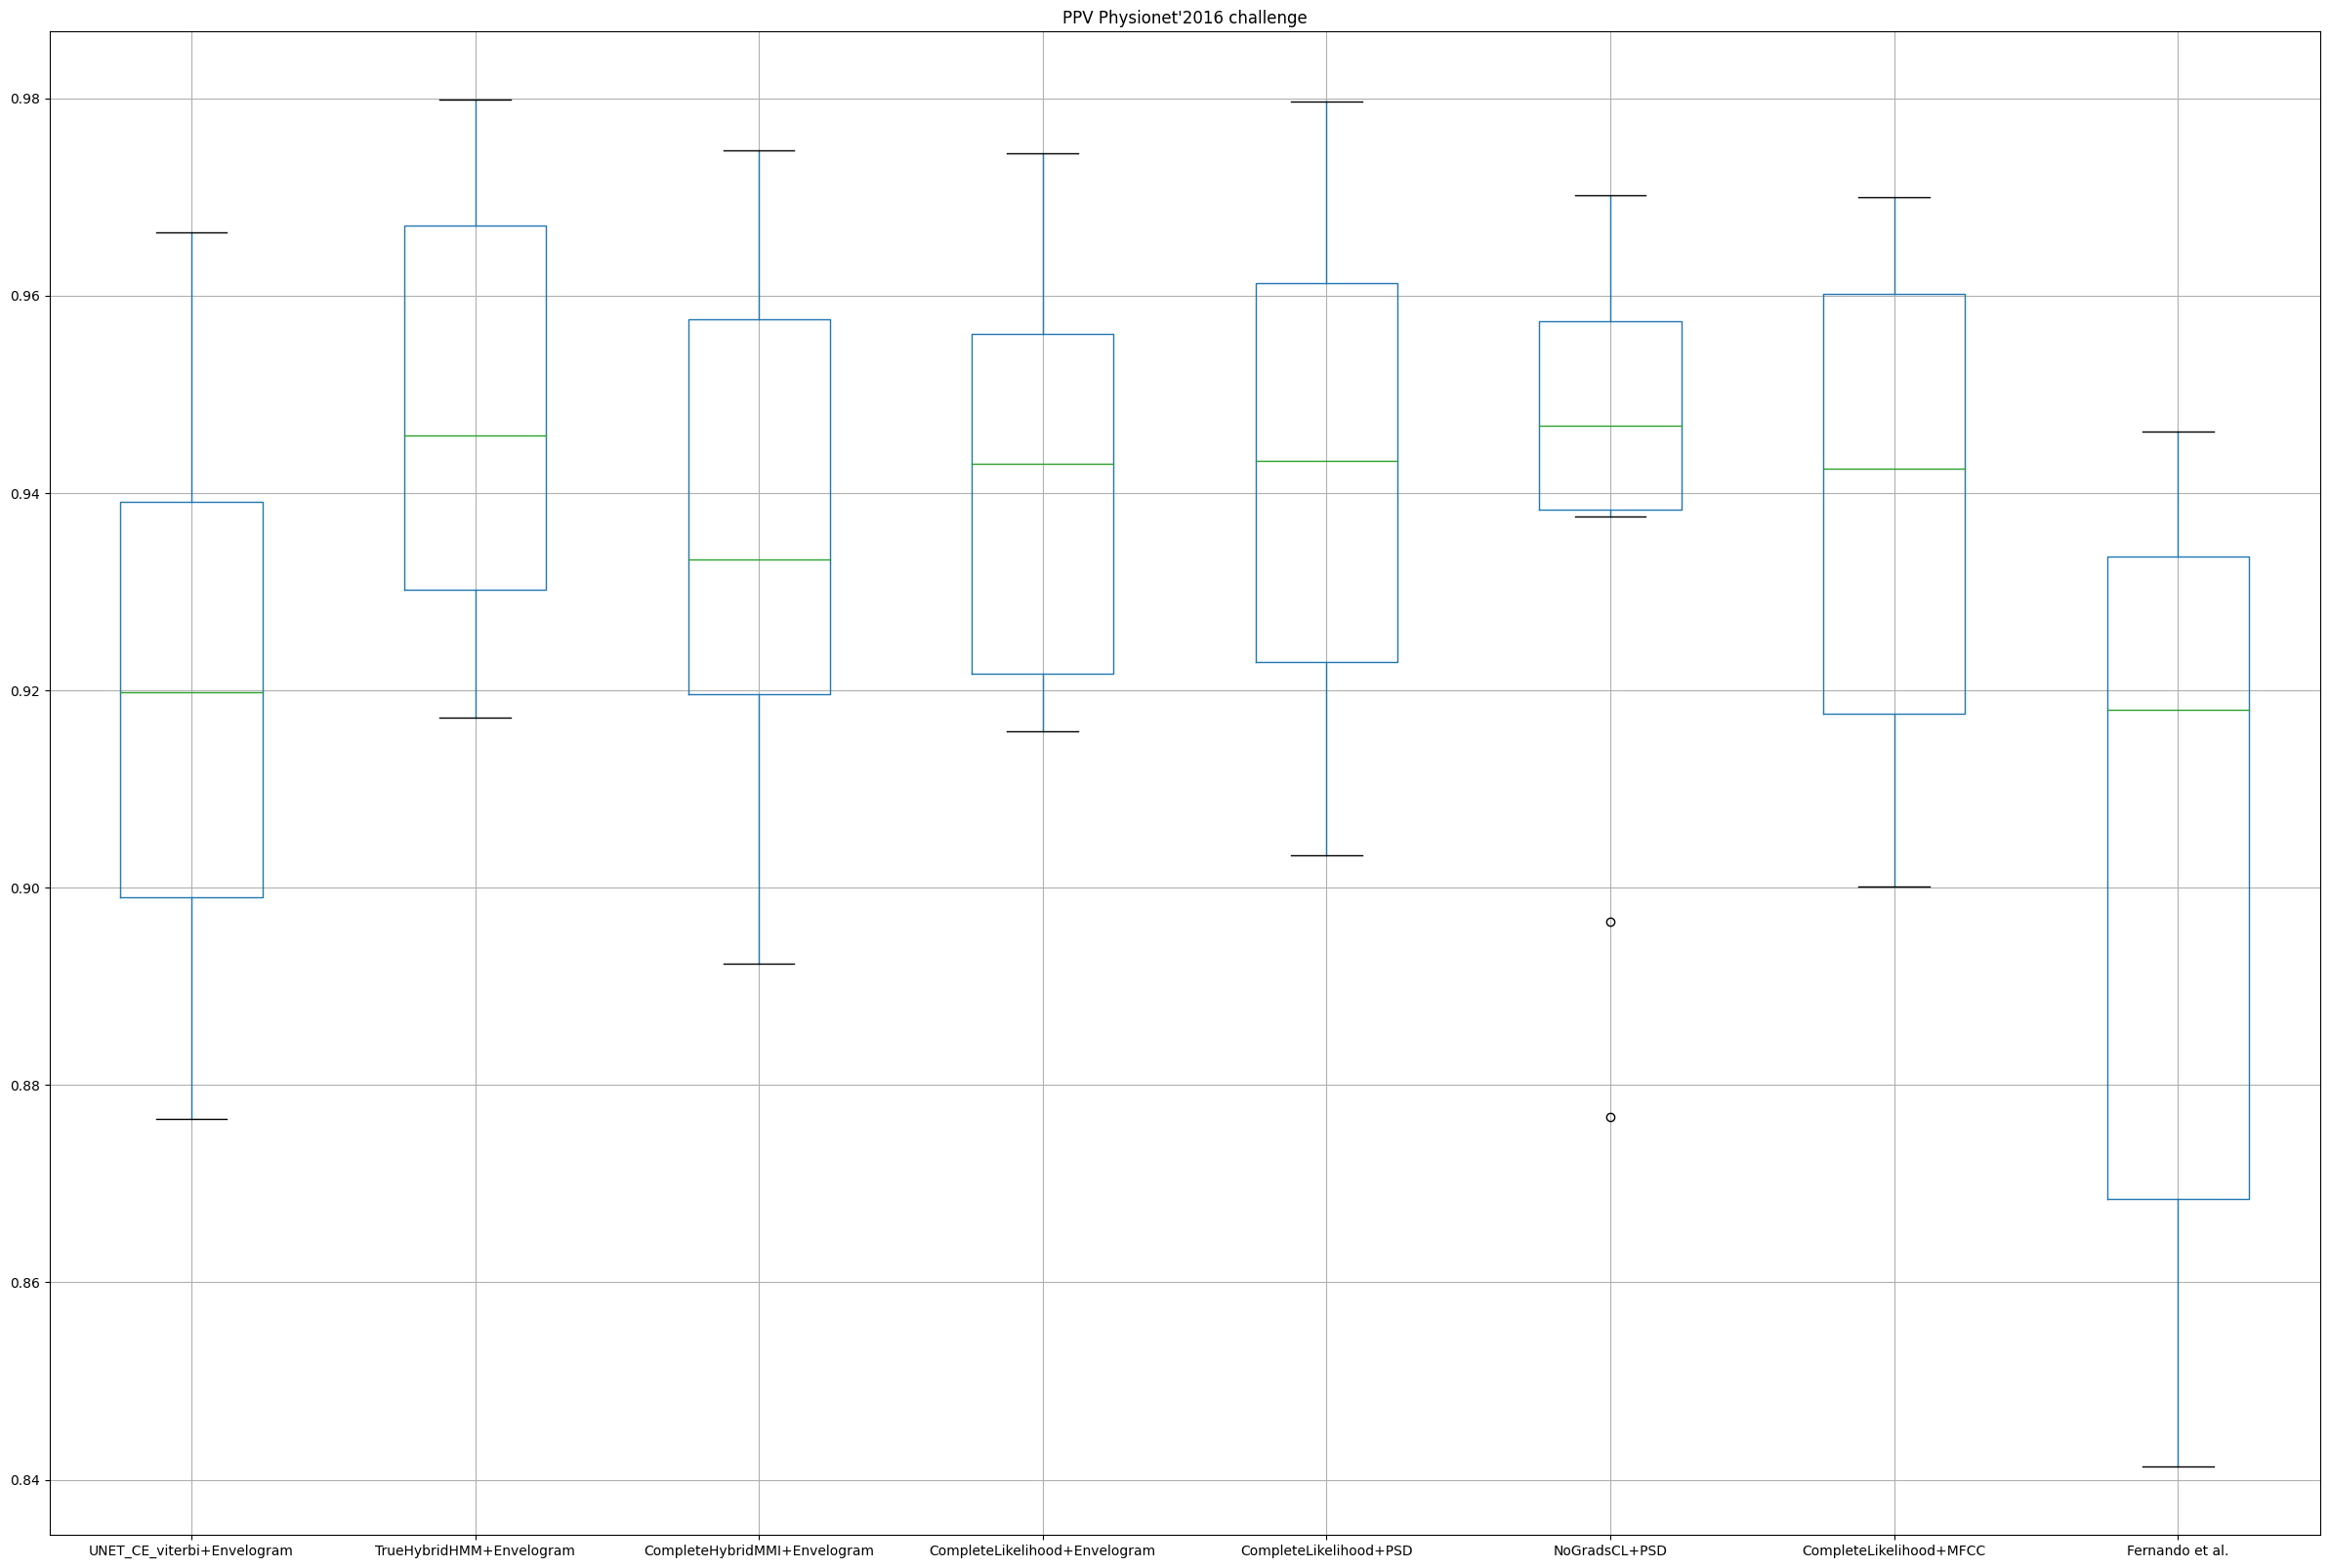

In [33]:
df = pd.DataFrame({'UNET_CE_viterbi+Envelogram': ph16_crosse_unet_env[1],
                   'TrueHybridHMM+Envelogram': ph16_true_hybrid_cnn_env[1],
                   'CompleteHybridMMI+Envelogram': ph16_completemmi_hybrid_cnn_env[1],
                   'CompleteLikelihood+Envelogram':ph16_completelikelihood_hybrid_cnn_env[1],
                   # 'NoGradsCL+Envelogram': ph16_completelikelihood_nograds_cnn_env[0], 
                   'CompleteLikelihood+PSD': ph16_completelikelihood_hybrid_cnn_psd[1],
                   'NoGradsCL+PSD': ph16_completelikelihood_cnngrads_psd[1],
                   'CompleteLikelihood+MFCC': ph16_completelikelihood_hybrid_cnn_mfcc[1],
                   'Fernando et al.': ph16_fernado_mfcc_joint[1],
                   }) # no grads CL, no grads MMI,  CL envelogram, corrected fernando
    
# fine tune best HMM
# transfer u-net, fernando and springer

boxplot = df.boxplot(column=list(df.keys()), figsize=(30,20))
plt.title('PPV Physionet\'2016 challenge')
plt.show()

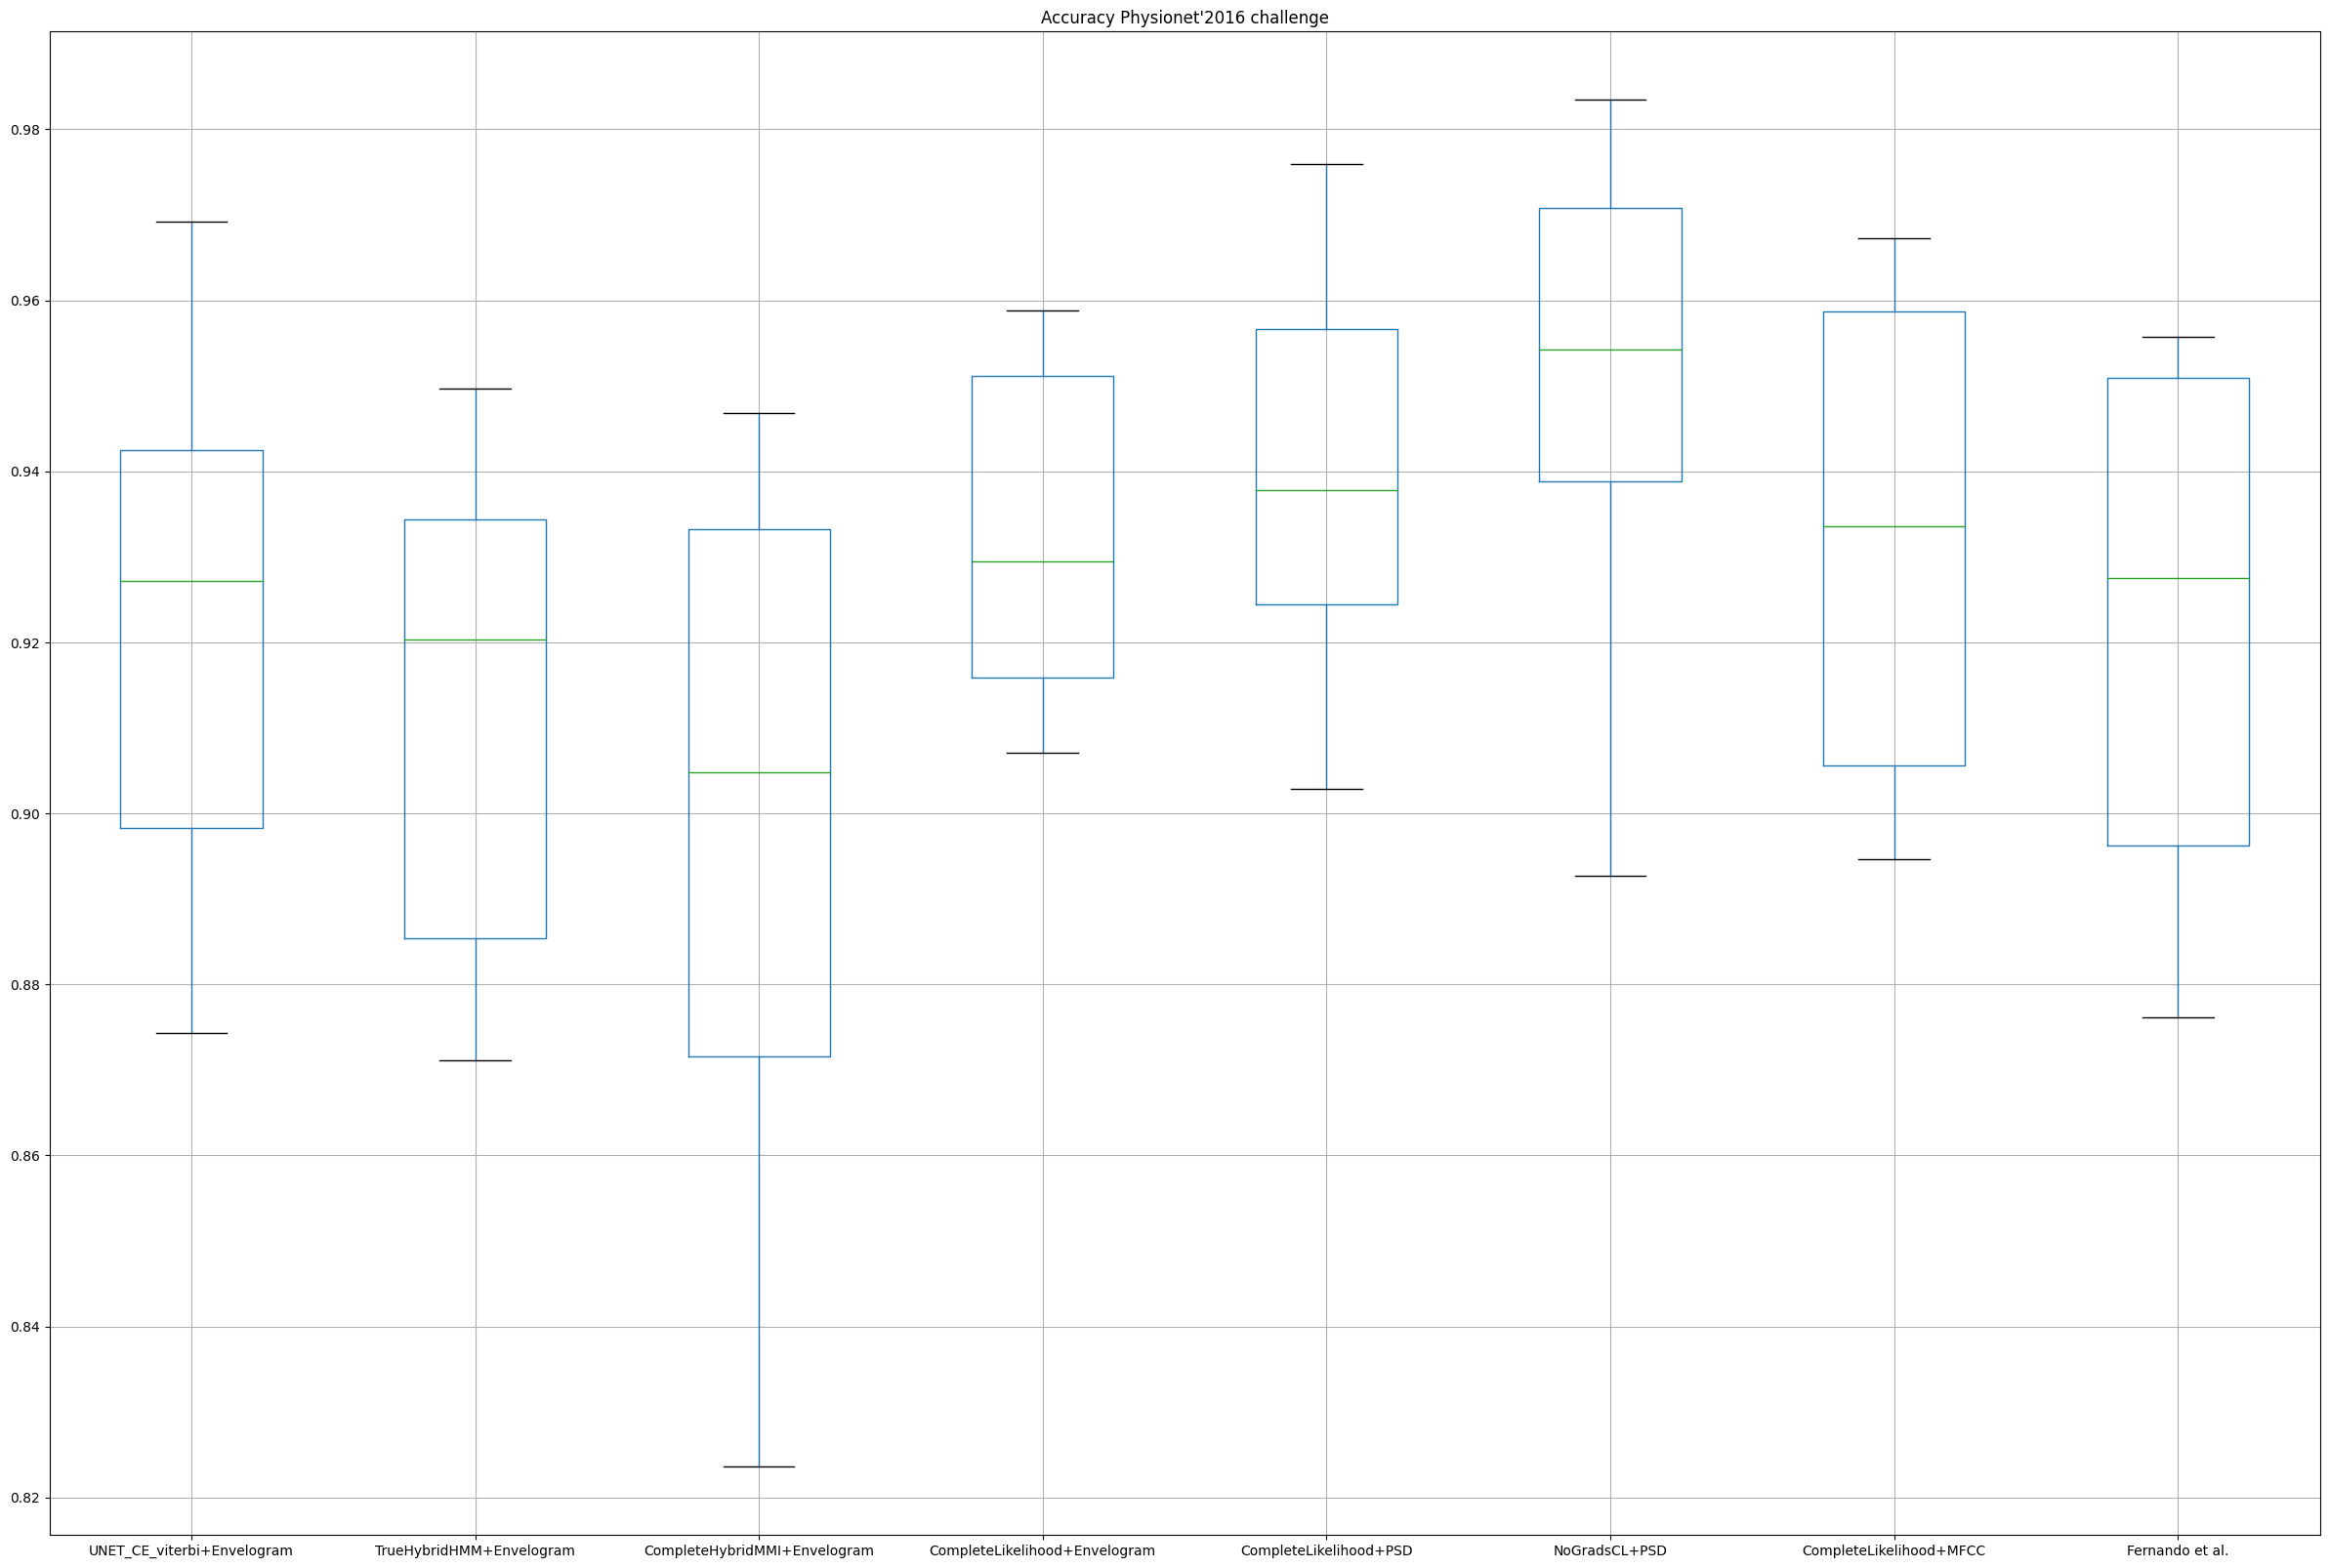

In [34]:
df = pd.DataFrame({'UNET_CE_viterbi+Envelogram': ph16_crosse_unet_env[2],
                   'TrueHybridHMM+Envelogram': ph16_true_hybrid_cnn_env[2],
                   'CompleteHybridMMI+Envelogram': ph16_completemmi_hybrid_cnn_env[2],
                   'CompleteLikelihood+Envelogram':ph16_completelikelihood_hybrid_cnn_env[2],
                   # 'NoGradsCL+Envelogram': ph16_completelikelihood_nograds_cnn_env[0], 
                   'CompleteLikelihood+PSD': ph16_completelikelihood_hybrid_cnn_psd[2],
                   'NoGradsCL+PSD': ph16_completelikelihood_cnngrads_psd[2],
                   'CompleteLikelihood+MFCC': ph16_completelikelihood_hybrid_cnn_mfcc[2],
                   'Fernando et al.': ph16_fernado_mfcc_joint[2],
                   }) # no grads CL, no grads MMI,  CL envelogram, corrected fernando
    
# fine tune best HMM
# transfer u-net, fernando and springer

boxplot = df.boxplot(column=list(df.keys()), figsize=(30,20))
plt.title('Accuracy Physionet\'2016 challenge')
plt.show()

In [35]:
df = pd.DataFrame({'UNET_CE_viterbi+Envelogram': ph16_crosse_unet_env[2],
                   'HybridGradients+Envelogram': ph16_hybrid_cnn_env[2],
                   'HybridGradients+PSD': ph16_hybrid_cnn_psd[2],
                   'TrueHybridHMM+Envelogram': ph16_true_hybrid_cnn_env[2],
                   'CompleteHybridMMI+Envelogram': ph16_completemmi_hybrid_cnn_env[2],
                   'CompleteLikelihood+Envelogram':ph16_completelikelihood_hybrid_cnn_env[2],
                   'NoGradsCL+Envelogram': ph16_completelikelihood_nograds_cnn_env[2], 
                   'CompleteLikelihood+PSD': ph16_completelikelihood_hybrid_cnn_psd[2],
                   'NoGradsCL+PSD': ph16_completelikelihood_cnngrads_psd[2],
                   'FtHMMCL+PSD20': ph16_psd_fine_tune_hmm20[2],
                   'CompleteLikelihood+MFCC': ph16_completelikelihood_hybrid_cnn_mfcc[2],
                   'Fernando et al.': ph16_fernado_mfcc_joint[1],
                   })

boxplot = df.boxplot(column=list(df.keys()), figsize=(30,20))
plt.title('Sensitivity Physionet\'2016 challenge')
plt.show()

NameError: name 'ph16_completelikelihood_nograds_cnn_env' is not defined

In [ ]:
!ls results/hybrid/hmm_completlikelihood1e3_physio16_envelops_joint/2022-03-20_12:55:33

In [ ]:
!ls results/unet/unet/2022-02-26_07:49:39

In [ ]:
ph16_psd_fine_tune[0]

In [ ]:
ph16_psd_fine_tune2[0]

In [ ]:
ph16_psd_ft_hmm_cnn[2]

In [ ]:
np.sum(ph16_psd_ft_hmm_cnn[1]) / 8

In [ ]:
[1, 2, 3, 4] + [5]

In [ ]:
df = pd.DataFrame({'UNET_CE_viterbi+Envelogram': ph16_crosse_unet_env[1],
                   'HybridGradients+Envelogram': ph16_hybrid_cnn_env[1],
                   'HybridGradients+PSD': ph16_hybrid_cnn_psd[1],
                   'TrueHybridHMM+Envelogram': ph16_true_hybrid_cnn_env[1],
                   'CompleteHybridMMI+Envelogram': ph16_completemmi_hybrid_cnn_env[1],
                   'CompleteLikelihood+Envelogram':ph16_completelikelihood_hybrid_cnn_env[1],
                   'NoGradsCL+Envelogram': ph16_completelikelihood_nograds_cnn_env[1], 
                   'CompleteLikelihood+PSD': ph16_completelikelihood_hybrid_cnn_psd[1],
                   'NoGradsCL+PSD': ph16_completelikelihood_cnngrads_psd[1],
                   'FtHMMCL+PSD20': ph16_psd_fine_tune_hmm20[1],
                   'CompleteLikelihood+MFCC': ph16_completelikelihood_hybrid_cnn_mfcc[1],
                   'NoGradsCL+PSD': ph16_completelikelihood_nograds_cnn_psd[1], 
                   'Fernando et al.': ph16_fernado_mfcc_joint[1],
                   })

boxplot = df.boxplot(column=list(df.keys()), figsize=(30,20))
plt.title('PPV Physionet\'2016 challenge')
plt.show()